<b>This notebook divide a single mailing list corpus into threads.</b> 

What it does:
-identifies the more participated threads
-identifies the long lasting threads
-export each thread's emails into seperate .csv files, setting thresholds of participation and duration

Parameters to set options:
-set a single URL related to a mailing list, setting the 'url' variable
-it exports files in the file path specified in the variable ‘path’
-you can set a threshold of participation and of duration for the threads to export, by setting 'min_participation' and 'min_duration' variables

In [25]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.thread import Thread
from bigbang.thread import Node
from bigbang.utils import remove_quoted
import matplotlib.pyplot as plt
import datetime
import csv
from collections import defaultdict

First, collect data from a public email archive.

In [26]:
#insert one URL related to the mailing list of interest
url = "http://mm.icann.org/pipermail/wp4/"


arx = Archive(url,archive_dir="../archives")

Let's check the number of threads in this mailing list corpus

In [27]:
print len(arx.get_threads())

38

We can  plot the number of people participating in each thread.

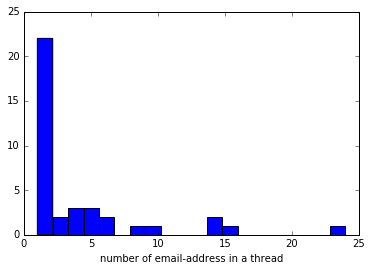

In [60]:
n = [t.get_num_people() for t in arx.get_threads()]

plt.hist(n, bins = 20)
plt.xlabel('number of email-address in a thread')
plt.show()

The *duration* of a thread is the amount of elapsed time between its first and last message. 

Let's plot the number of threads per each number of days of duration


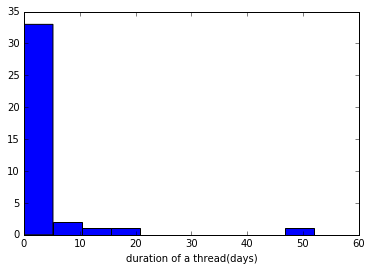

In [61]:
y = [t.get_duration().days for t in arx.get_threads()]

plt.hist(y, bins = (10))
plt.xlabel('duration of a thread(days)')
plt.show()

Export the content of each thread into a .csv file (named: thread_1.csv, thread2.csv, ...).

You can set a minimum level of participation and duration, based on the previous analyses

In [62]:
#Insert the participation threshold (number of people)
#(for no threeshold: 'min_participation = 0') 
min_participation = 0

#Insert the duration threshold (number of days)
#(for no threeshold: 'min_duration = 0')
min_duration = 0

#Insert the directory path where to save the files
path = 'c:/users/davide/bigbang/'



i = 0
for thread in arx.get_threads():
    if thread.get_num_people() >= min_participation and thread.get_duration().days >= min_duration:
            i += 1
            f = open(path+'thread_'+str(i)+'.csv', "wb")
            f_w = csv.writer(f)
            f_w.writerow(thread.get_content())
            f.close()